Epoch 1/50


c:\Users\sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2300/2300 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6493 - loss: 814.8160 - val_accuracy: 0.7705 - val_loss: 0.5679
Epoch 2/50
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7392 - loss: 1.7147 - val_accuracy: 0.7705 - val_loss: 0.5387
Epoch 3/50
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7623 - loss: 0.8323 - val_accuracy: 0.7705 - val_loss: 0.5387
Epoch 4/50
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7689 - loss: 0.6360 - val_accuracy: 0.7705 - val_loss: 0.5387
Epoch 5/50
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7697 - loss: 0.5676 - val_accuracy: 0.7705 - val_loss: 0.5387
Epoch 6/50
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7677 - loss: 0.5570 - val_accuracy: 0.7705 - val_loss: 0.5387
Epoch 7/50
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7718 - loss: 0.5439 - val_accuracy: 0.7705 - val_loss: 0.5387
Epoch 8/50
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7712 - loss: 0.5381 - val_accur

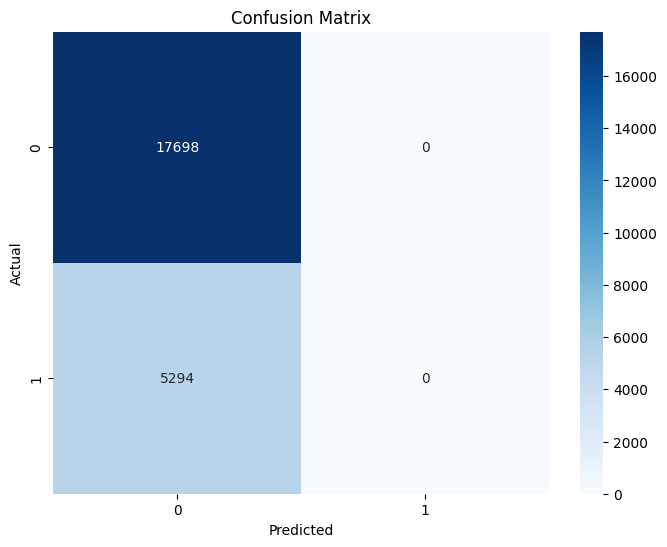


Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     17698
           1       0.00      0.00      0.00      5294

    accuracy                           0.77     22992
   macro avg       0.38      0.50      0.43     22992
weighted avg       0.59      0.77      0.67     22992



c:\Users\sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

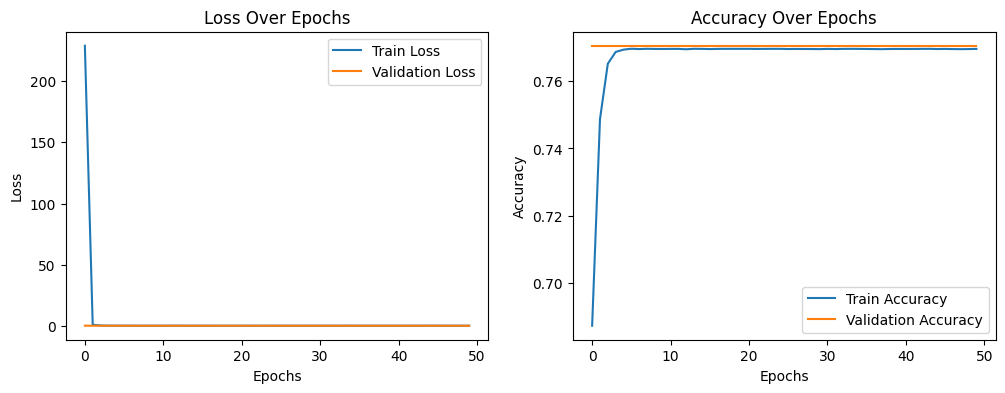

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
df = pd.read_csv('River.csv')

# Data preprocessing
df_filtered = df[['pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids', 'Water Temperature', 'Target']]
df_filtered = df_filtered.dropna()

# Encode categorical features
categorical_cols = ['Color', 'Odor']
le = LabelEncoder()
for col in categorical_cols:
    df_filtered[col] = le.fit_transform(df_filtered[col])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['pH', 'Nitrate', 'Turbidity', 'Chlorine', 'Total Dissolved Solids', 'Water Temperature']
df_filtered[numerical_cols] = scaler.fit_transform(df_filtered[numerical_cols])

# Split dataset into training and testing sets
X = df_filtered.drop('Target', axis=1)
y = df_filtered['Target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define the ANN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' if there are more than 2 classes
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Adjust threshold for multi-class if needed
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save the model
model.save('ann_model.h5')